In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_cwts(instances, images_per_row=10, **options):
    size = 100
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [2]:
time_data = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_collecting_raw.csv", thousands=',')

In [3]:
time_data.head()

,Channel,10-20,ChannelGroup,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,1,P4,0,-0.217546,-0.061367,0.09732,0.256501,0.414375,0.569185,0.717101,...,0.11289,-0.028729,-0.169435,-0.305045,-0.432296,-0.548133,-0.648841,-0.730098,-0.788025,-0.820497
1,2,P4,0,-0.217546,-0.061367,0.09732,0.256501,0.414375,0.569185,0.717101,...,0.11289,-0.028729,-0.169435,-0.305045,-0.432296,-0.548133,-0.648841,-0.730098,-0.788025,-0.820497
2,3,P4,0,-0.217546,-0.061367,0.09732,0.256501,0.414375,0.569185,0.717101,...,0.11289,-0.028729,-0.169435,-0.305045,-0.432296,-0.548133,-0.648841,-0.730098,-0.788025,-0.820497
3,4,P4,0,-0.217546,-0.061367,0.09732,0.256501,0.414375,0.569185,0.717101,...,0.11289,-0.028729,-0.169435,-0.305045,-0.432296,-0.548133,-0.648841,-0.730098,-0.788025,-0.820497
4,5,P4,0,-0.217546,-0.061367,0.09732,0.256501,0.414375,0.569185,0.717101,...,0.11289,-0.028729,-0.169435,-0.305045,-0.432296,-0.548133,-0.648841,-0.730098,-0.788025,-0.820497


In [4]:
time_data.iloc[0]

Channel                1
10-20                 P4
ChannelGroup           0
0              -0.217546
1              -0.061367
                  ...   
95             -0.548133
96             -0.648841
97             -0.730098
98             -0.788025
99             -0.820497
Name: 0, Length: 103, dtype: object

Saving figure some_cwt_plot


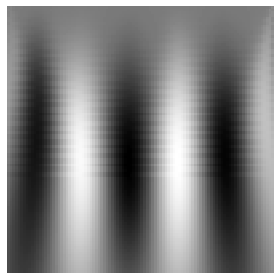

In [5]:
from scipy import signal

widths = np.linspace(1.0, 15.0, 100);
npsig = time_data.iloc[0]

npsig = npsig.drop(labels=['Channel', '10-20', 'ChannelGroup'])

npsigIter = np.fromiter(npsig, float)
mock_alpha_cwt = signal.cwt(npsigIter, signal.ricker, widths);

mock_alpha_cwt_flattened = mock_alpha_cwt.flatten()
mock_alpha_cwt_dataframe = pd.DataFrame(mock_alpha_cwt_flattened)
#mock_alpha_one_cwt = signal.cwt(mock_alpha[0], signal.ricker, widths);

some_cwt = mock_alpha_cwt_dataframe
some_cwt_image = some_cwt.values.reshape(100, 100)
plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

Saving figure more_digits_plot


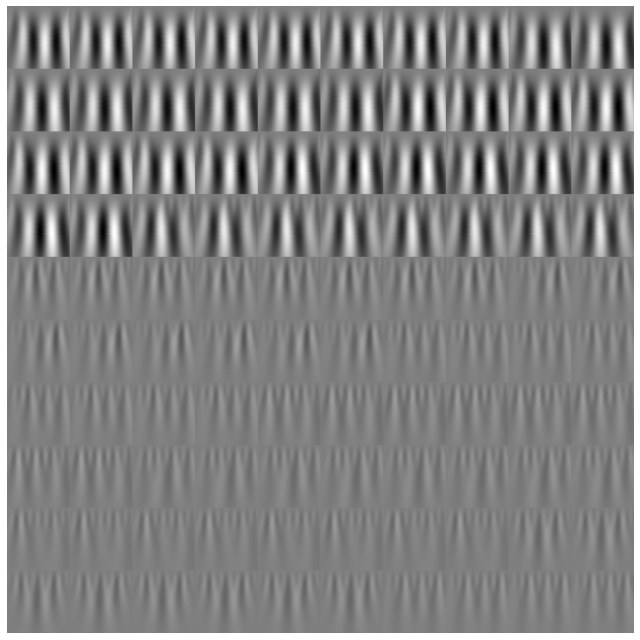

In [6]:
cwt_data = []

widths = np.linspace(1.0, 15.0, 100);

example_time_data = time_data.drop(labels=['Channel', '10-20', 'ChannelGroup'], axis=1)
    
    
fs = 250.0
lowcut = 5.0
highcut = 15.0
example_time_data_filtered = pd.DataFrame(butter_bandpass_filter(example_time_data, lowcut, highcut, fs, order=2))


for index, value in enumerate(example_time_data_filtered.iloc):
    npsig = np.fromiter(example_time_data_filtered.iloc[index], float)
    row_cwt = signal.cwt(npsig, signal.ricker, widths)
    row_cwt_flattened = row_cwt.flatten()
    cwt_data.append(row_cwt_flattened)

plt.figure(figsize=(9,9))
example_images = np.r_[cwt_data[:100]]
plot_cwts(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

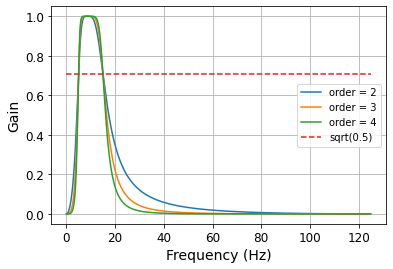

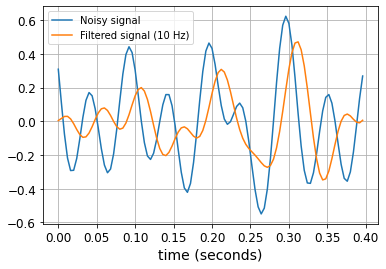

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 250.0
lowcut = 5.0
highcut = 15.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [2, 3, 4]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

# Filter a noisy signal.
f0 = 10.0
T = 0.4
nsamples = int(T * fs)
t = np.linspace(0, T, nsamples, endpoint=False)
x = np.array(example_time_data.iloc[50])

plt.figure(2)
plt.clf()
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=2)
plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
#plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()